In [1]:
import torch, os
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
from src.models.model import VAE
from src.utils import *
from src.interact_func import *

In [2]:
model = VAE(130, 2048, 512, 32)
model.eval()
dic = torch.load('params/tr_512.pt')
for name in list(dic.keys()):
    dic[name.replace('module.', '')] = dic.pop(name)
model.load_state_dict(dic)
if torch.cuda.is_available():
    model = model.cuda()



data1 = np.load('/scratch/dw1920/batch_0.npy')
# data2 = np.load('/scratch/dw1920/batch_1.npy')
# data3 = np.load('/scratch/dw1920/batch_2.npy')

In [3]:
# data = torch.from_numpy(np.concatenate(np.array([data1, data2]), 0)).float().cuda()

all_z = []
batch_size = 1000
for i in range(5):
    data = torch.from_numpy(data1[i*batch_size:(i+1)*batch_size]).float().cuda()
    z = model.encode(data).mean
    all_z.append(z)
    print(i)


0
1
2
3
4


In [5]:
type(all_z[0])

torch.Tensor

In [10]:
from sklearn.decomposition import PCA

for i in range(len(all_z)):
    all_z[i] = all_z[i].cpu().detach().numpy()
x=np.concatenate(np.array(all_z), 0)
X_scaler = StandardScaler()
x = X_scaler.fit_transform(x)
pca = PCA(n_components=128)
pca.fit(x)
pca.transform(x)

array([[-1.4823895e+00, -2.9129460e-01,  2.0868653e-01, ...,
        -3.3182394e-02,  6.9681015e-03,  4.5347698e-03],
       [-1.2623867e+00,  6.8948340e-01,  2.0349021e+00, ...,
        -1.0947505e-01, -6.2184788e-02, -1.5327931e-02],
       [-1.5540783e+00, -8.1145763e-04,  1.8969086e+00, ...,
        -4.3501098e-02, -4.3239452e-02, -7.7083334e-03],
       ...,
       [ 2.6605687e-01,  6.3742733e-01, -4.7860944e-01, ...,
        -3.8995083e-02,  1.2030527e-02,  4.0915519e-02],
       [ 4.7515911e-01,  5.3730255e-01, -7.4957508e-01, ...,
        -8.8218123e-02,  4.9100235e-02,  1.3837695e-02],
       [ 2.1898973e-01,  3.9276981e-01, -1.0016798e+00, ...,
        -1.0235637e-02,  3.1893142e-06,  2.3176968e-03]], dtype=float32)

In [12]:
cov_mat = np.cov(x, rowvar = 0)

In [14]:
sigma = cov_mat
[U,S,V] = np.linalg.svd(sigma)

In [19]:
s_out = 0
for i in range(128):
    s_out += S[i]

t_out = 0
for i in range(512):
    t_out += S[i]
    
print(s_out/t_out)

0.9985638815858726


In [20]:
print(pca.explained_variance_ratio_)

[9.05715749e-02 4.56130132e-02 4.41077687e-02 3.64825986e-02
 3.42627168e-02 3.13340463e-02 3.04576233e-02 2.80369911e-02
 2.70805992e-02 2.52360888e-02 2.42980327e-02 2.33987328e-02
 2.32443847e-02 2.22014580e-02 2.12191939e-02 2.09869724e-02
 2.07694136e-02 1.98004805e-02 1.81677062e-02 1.77984107e-02
 1.68580301e-02 1.60355493e-02 1.56560689e-02 1.54074822e-02
 1.51220784e-02 1.41281420e-02 1.39214415e-02 1.33382622e-02
 1.30666569e-02 1.25548961e-02 1.22085316e-02 1.20040700e-02
 1.15167275e-02 1.14557939e-02 1.09044956e-02 1.06805703e-02
 1.04183666e-02 9.99720953e-03 9.40191559e-03 8.45696963e-03
 8.10612924e-03 8.00876226e-03 7.82672595e-03 7.54211238e-03
 6.92399405e-03 6.51886174e-03 6.33058604e-03 6.13758806e-03
 5.85615309e-03 5.38828503e-03 5.02050156e-03 4.68285615e-03
 4.59481589e-03 4.47491603e-03 4.17616777e-03 3.93403368e-03
 3.54929082e-03 3.46350041e-03 3.14763933e-03 3.01926420e-03
 2.87754834e-03 2.76944065e-03 2.53338972e-03 2.26060278e-03
 1.98282441e-03 1.874772

In [22]:
var = pca.explained_variance_ratio_
varz = {}

for i, j in enumerate(var):
    varz[i+1] = j


In [23]:
sorted_by_value = sorted(varz.items(), key=lambda kv: kv[1]).reverse()

In [26]:
sorted_by_value

[(1, 0.090571575),
 (2, 0.045613013),
 (3, 0.04410777),
 (4, 0.0364826),
 (5, 0.034262717),
 (6, 0.031334046),
 (7, 0.030457623),
 (8, 0.028036991),
 (9, 0.0270806),
 (10, 0.025236089),
 (11, 0.024298033),
 (12, 0.023398733),
 (13, 0.023244385),
 (14, 0.022201458),
 (15, 0.021219194),
 (16, 0.020986972),
 (17, 0.020769414),
 (18, 0.01980048),
 (19, 0.018167706),
 (20, 0.01779841),
 (21, 0.01685803),
 (22, 0.01603555),
 (23, 0.015656069),
 (24, 0.015407482),
 (25, 0.015122078),
 (26, 0.014128142),
 (27, 0.0139214415),
 (28, 0.013338262),
 (29, 0.013066657),
 (30, 0.012554896),
 (31, 0.012208532),
 (32, 0.01200407),
 (33, 0.0115167275),
 (34, 0.011455794),
 (35, 0.010904496),
 (36, 0.01068057),
 (37, 0.010418367),
 (38, 0.0099972095),
 (39, 0.009401916),
 (40, 0.00845697),
 (41, 0.008106129),
 (42, 0.008008762),
 (43, 0.007826726),
 (44, 0.0075421124),
 (45, 0.006923994),
 (46, 0.0065188617),
 (47, 0.006330586),
 (48, 0.006137588),
 (49, 0.005856153),
 (50, 0.005388285),
 (51, 0.00502050

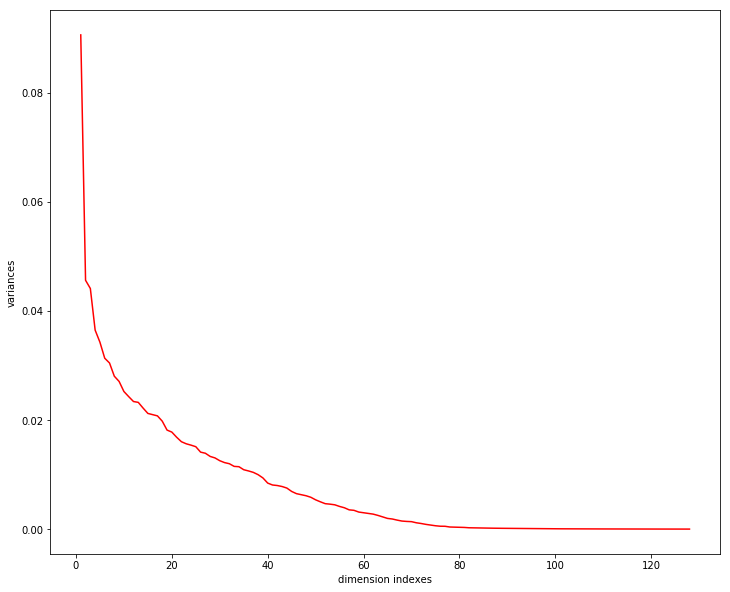

In [32]:
dims = [i[0] for i in sorted_by_value]
var = [i[1] for i in sorted_by_value]
plt.figure(figsize=(12, 10))
plt.ylabel('variances')
plt.xlabel("dimension indexes")
plt.plot(dims, var, color='red', linestyle='solid')
plt.title('')
plt.savefig('pca.png',bbox_inches="tight", dpi=300)
plt.show()
